In [14]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
from tensorflow import keras # deep learning
from PIL import Image # Image processing

In [5]:
model= from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

config.json not found in HuggingFace Hub


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

C:\Users\LENOVO\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/437M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/219k [00:00<?, ?B/s]

In [7]:
low_light_img = Image.open('lowlight.jfif').convert('RGB')

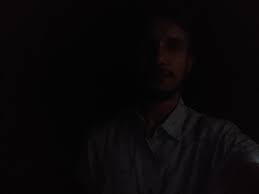

In [8]:
low_light_img

In [11]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)

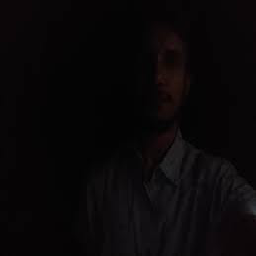

In [12]:
low_light_img

In [15]:
image = keras.preprocessing.image.img_to_array(low_light_img)

In [16]:
image.shape

(256, 256, 3)

In [17]:
image = image.astype('float32') / 255.0

In [18]:
image.shape

(256, 256, 3)

In [19]:
image = np.expand_dims(image, axis = 0)

In [20]:
image.shape

(1, 256, 256, 3)

In [21]:
output = model.predict(image) # model inference to enhance the low light pics

1/1 [==============================] - 15s 15s/step


In [22]:
output_image = output[0] * 255.0

In [23]:
output_image.shape

(256, 256, 3)

In [24]:
output_image = output_image.clip(0,255)

In [25]:
output_image.shape

(256, 256, 3)

In [26]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [27]:
output_image

array([[[ 77.58971 ,  74.11069 ,  63.162254],
        [ 96.55783 ,  86.699875,  76.18946 ],
        [101.391594, 102.80447 ,  90.462036],
        ...,
        [115.84094 ,  98.313065, 100.29729 ],
        [102.85081 ,  84.89429 ,  82.26073 ],
        [ 76.84148 ,  62.52334 ,  69.91882 ]],

       [[ 90.33776 ,  84.967674,  83.81048 ],
        [117.6217  ,  97.8098  ,  93.60778 ],
        [120.09918 , 113.11046 , 101.49003 ],
        ...,
        [127.44856 , 111.19412 , 109.30135 ],
        [124.08978 , 106.291275,  98.13225 ],
        [101.58322 ,  84.009865,  86.05152 ]],

       [[ 99.895874,  91.46999 ,  94.004524],
        [127.74538 , 105.77129 ,  97.098434],
        [133.68701 , 120.494675, 105.9181  ],
        ...,
        [138.03395 , 114.56271 , 114.07638 ],
        [135.57957 , 110.24002 , 102.51637 ],
        [116.59208 ,  95.43802 ,  91.862015]],

       ...,

       [[ 81.84646 ,  80.37472 ,  73.36323 ],
        [102.778725,  91.99132 ,  83.09337 ],
        [110.069565, 1

In [53]:
output_image = np.uint8(output_image)

In [54]:
output_image.shape

(256, 256, 3)

In [55]:
output_image

array([[[ 77,  74,  63],
        [ 96,  86,  76],
        [101, 102,  90],
        ...,
        [115,  98, 100],
        [102,  84,  82],
        [ 76,  62,  69]],

       [[ 90,  84,  83],
        [117,  97,  93],
        [120, 113, 101],
        ...,
        [127, 111, 109],
        [124, 106,  98],
        [101,  84,  86]],

       [[ 99,  91,  94],
        [127, 105,  97],
        [133, 120, 105],
        ...,
        [138, 114, 114],
        [135, 110, 102],
        [116,  95,  91]],

       ...,

       [[ 81,  80,  73],
        [102,  91,  83],
        [110, 104,  89],
        ...,
        [129, 107,  99],
        [123, 102,  94],
        [110,  89,  88]],

       [[ 77,  66,  68],
        [101,  83,  80],
        [107,  96,  87],
        ...,
        [115,  97,  91],
        [105,  96,  91],
        [ 94,  84,  80]],

       [[ 57,  48,  56],
        [ 77,  69,  67],
        [ 89,  75,  70],
        ...,
        [ 94,  80,  75],
        [ 82,  74,  75],
        [ 73,  64,  54]]

In [35]:
kk=Image.fromarray(output_image.astype('uint8'),'RGB')

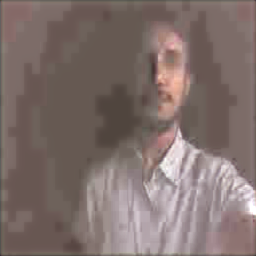

In [36]:
kk

In [31]:
import cv2 as cv

In [32]:
import matplotlib.pyplot as plt

In [33]:
net=cv.dnn.readNetFromTensorflow("graph_opt.pb")

In [34]:
inWidth=368
inHeight=368
thr=0.2

In [37]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [56]:
img1=output_image

numpy.ndarray

In [57]:
img1.shape

(256, 256, 3)

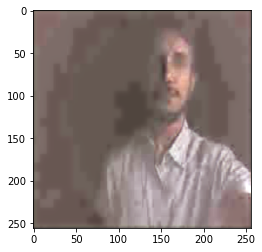

In [58]:
plt.imshow(output_image)

In [42]:
def pose_estimation(frame):
    frameWidth=frame.shape[1]
    frameHeight=frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5,127.5,127.5),swapRB=True,crop=False))
    out=net.forward()
    out=out[:,:19,:,:]
    
    assert(len(BODY_PARTS)==out.shape[1])
    points=[]
    
    for i in range(len(BODY_PARTS)):
        heatMap=out[0,i,:,:]
        
        
        _,conf,_,point=cv.minMaxLoc(heatMap)
        x=(frameWidth*point[0])/out.shape[3]
        y=(frameHeight*point[1])/out.shape[2]
        
        points.append((int(x),int(y)) if conf > thr else None)
        
    for pair in POSE_PAIRS:
        partFrom=pair[0]
        partTo=pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)
        
        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]
        
        
        if points[idFrom] and points[idTo]:
            cv.line(frame,points[idFrom],points[idTo],(0,255,0),1)
            cv.ellipse(frame,points[idFrom],(2,2),0,0,360,(0,0,255),cv.FILLED)
            cv.ellipse(frame,points[idTo],(2,2),0,0,360,(0,0,255),cv.FILLED)
            
    t,_ = net.getPerfProfile()
    freq=cv.getTickFrequency()/1000
    cv.putText(frame,'%.2fms'%(t/freq),(10,20), cv.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0))
    return frame

In [59]:
estimated_image=pose_estimation(img1)

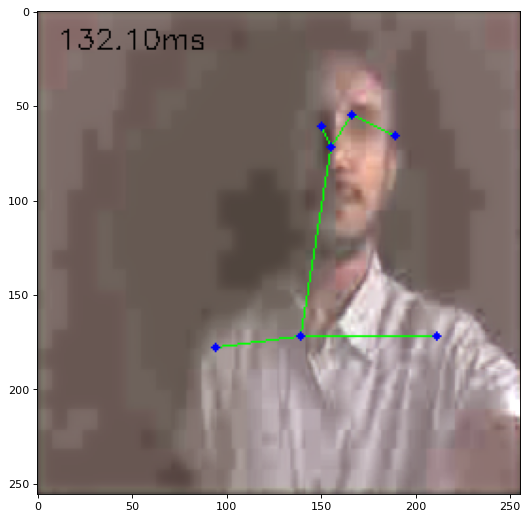

In [61]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

plt.imshow(estimated_image)